https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv 

In [2]:
#pip install geopandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
data_types = {"SCHEDULED_DEPARTURE":str,
              "DEPARTURE_TIME": str,
              "WHEELS_OFF": str,
              "WHEELS_ON": str,
              "SCHEDULED_ARRIVAL": str,
              "ARRIVAL_TIME": str}
flights = pd.read_csv('./data/flights.csv', converters=data_types, na_values = '?')
flights.head() #5 rows x 31 columns
#flights.shape #5,819,079 rows x 31 columns

C:\Users\Alissa\AppData\Local\Temp\ipykernel_24556\2112069779.py:7: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('./data/flights.csv', converters=data_types, na_values = '?')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airlines = pd.read_csv('./data/airlines.csv', na_values = '?')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
airports = pd.read_csv('./data/airports.csv', na_values = '?')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
#merge city and state along the airport column
flights_merged = pd.merge(flights, airports[["IATA_CODE","CITY","STATE"]], how = "left", left_on = "ORIGIN_AIRPORT", right_on = "IATA_CODE")
flights_merged = flights_merged.rename(columns = {"CITY":"ORIGIN_CITY","STATE":"ORIGIN_STATE"})
flights_merged = flights_merged.drop("IATA_CODE", axis = 1)
flights_merged = pd.merge(flights_merged, airports[["IATA_CODE","CITY","STATE"]], how = "left", left_on = "DESTINATION_AIRPORT", right_on = "IATA_CODE")
flights_merged = flights_merged.rename(columns = {"CITY":"DESTINATION_CITY","STATE":"DESTINATION_STATE"})
flights_merged = flights_merged.drop("IATA_CODE", axis = 1)
flights_merged.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,NaN,NaN,NaN,NaN,NaN,NaN,Anchorage,AK,Seattle,WA
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,CA,West Palm Beach,FL
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,CA,Charlotte,NC
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,CA,Miami,FL
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,NaN,NaN,NaN,NaN,NaN,NaN,Seattle,WA,Anchorage,AK


In [8]:
"""
#get unique values in each column
    ##to ensure that the data makes sense
for each in flights.columns: 
    print(each)
    print(flights[each].unique())
"""

'\n#get unique values in each column\n    ##to ensure that the data makes sense\nfor each in flights.columns: \n    print(each)\n    print(flights[each].unique())\n'

In [9]:
"""
#get basic 5-stats
for each in flights.columns: 
    print(flights[each].describe())
"""

'\n#get basic 5-stats\nfor each in flights.columns: \n    print(flights[each].describe())\n'

In [10]:

#to get value counts
for each in flights.columns: 
    print(each)
    print(flights[each].value_counts(dropna = False))


YEAR
YEAR
2015    5819079
Name: count, dtype: int64
MONTH
MONTH
7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: count, dtype: int64
DAY
DAY
2     195986
16    195899
20    195707
13    195089
9     194224
8     193964
23    193560
19    193284
15    192950
22    192725
27    191920
28    191401
18    191393
17    191319
6     191232
4     190893
12    190872
11    190756
3     190007
5     189766
1     189477
21    189413
10    189288
14    188611
7     187598
26    187387
25    187317
24    185017
29    179441
30    178771
31    103812
Name: count, dtype: int64
DAY_OF_WEEK
DAY_OF_WEEK
4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: count, dtype: int64
AIRLINE
AIRLINE
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836

# 1st goal: Understand the data
<b>31 Columns in the dataframe:</b> 
1. <b>Year:</b> All the same year of 2015 (float)
2. <b>Month:</b> 12 months of the year (float)
3. <b>Day:</b> Up to 31 days in some months (float)
4. <b>Day of the week:</b> 1-7, categorically encoded as Sun - Sat (float)
5. <b>Airline:</b> 14 types that are labeled as 2-letter acronym, example: AS = Alaska Airlines --- 14 unique (object)
6. <b>Flight number:</b> a 1- to 4-digit number, usually for the route (float)
7. <b>Tail number:</b> a unique ID number for a specific plane, made of letters and numbers --- 4897 unique (object)
8. <b>Origin airport:</b> IATA airport code, a 3-letter code; but some are 5 numbers??? --- 930 unique (object)
9. <b>Destination airport:</b> IATA airport code, a 3-letter code; but some are 5 numbers??? --- 930 unique (object)
10. <b>Scheduled departure:</b> a 1 to 3 digit number, a planned departure time point (24-hour time---opened OG file to confirm)--- <i>The OG file is removing the leading zeros when reading as a number, should keep as string before converting to datetime </i>
11. <b>Departure time:</b> time point that the aircraft left the gate of the origin airport (float)
12. <b>Departure delay:</b> time duration, in minutes, between scheduled and actual departure time (float)
13. <b>Taxi out:</b>  time duration, in minutes, between departure from the origin gate to wheels off the ground (float)
14. <b>Wheels off:</b> the time point that the aircraft's wheels leave the ground (float)
15. <b>Scheduled time:</b> time duration, in minutes, of flight's time from origin to destination (float)
16. <b>Elapsed time:</b> time duration, in minutes, of flight's time from gate (aka taxi out), air time, to gate (aka taxi in) (float)
17. <b>Air time:</b> time duration, in minutes, of flight's time from wheel's off ground to wheel's on ground (float)
18. <b>Distance:</b> distance, assumed miles, from origin to destination airport (float)
19. <b>Wheels on:</b> time point that the aircraft's wheels are on ground (float)
20. <b>Taxi in:</b> time duration, in minutes, of flight's wheels on ground to gate arrival (float)
21. <b>Scheduled arrival:</b> time point for a planned arrival time (24-hour time) (float)
22. <b>Arrival time:</b> time point that the aircraft's arrived at the gate (float)
23. <b>Arrival delay:</b> time duration, in minutes, between schedule and actual arrival time (float)
24. <b>Diverted:</b> binary for either no: 0 or yes: 1 (float)
25. <b>Cancelled:</b> binary for either no: 0 or yes: 1 (float)
26. <b>Cancelation reason:</b> reason for cancellation, 4 categories: A: airline, B: weather, C: air system, D: security (object)
27. <b>Air system delay:</b> "C" time duration, in minutes? (float)
28. <b>Security delay:</b> "D" time duration, in minutes? (float)
29. <b>Airline delay:</b> "A" time duration, in minutes? (float)
30. <b>Late aircraft delay:</b> Other reason? time duration, in minutes? (float)
31. <b>Weather delay:</b>  "B" time duration, in minutes? (float)

# 2nd goal: Transform the data so it makes sense/useful (about 6 million rows)
<i>Possible data types: numeric, boolean, <b>datetime</b>, object, categorical, string</i>

<b>31 Columns in the dataframe:</b> 
1. <b>Year:</b> 1 year; float --> datetime
2. <b>Month:</b> 12 months; float --> datetime
3. <b>Day:</b> 31 days; float --> datetime
4. <b>Day of the week:</b> 1-7: Sun - Sat; float (best for ML model)
5. <b>Airline:</b> 14 acronyms; object 
6. <b>Flight number:</b> 6952 1- to 4-digit number; float --> object
7. <b>Tail number:</b> 4897 unique ID numbers; object
8. <b>Origin airport:</b> 930 3-letter IATA airport code; object
9. <b>Destination airport:</b> 930 3-letter IATA airport code; object
10. <b>Scheduled departure:</b> time point; float --> datetime 
11. <b>Departure time:</b> time point; float --> datetime 
12. <b>Departure delay:</b> time duration, in minutes; float
13. <b>Taxi out:</b>  time duration, in minutes; float
14. <b>Wheels off:</b> time point; float --> datetime 
15. <b>Scheduled time:</b> time duration, in minutes; float
16. <b>Elapsed time:</b> time duration, in minutes; float
17. <b>Air time:</b> time duration, in minutes; float
18. <b>Distance:</b> distance, assumed miles; float
19. <b>Wheels on:</b> time point; float --> datetime 
20. <b>Taxi in:</b> time duration, in minutes; float
21. <b>Scheduled arrival:</b> time point; float --> datetime 
22. <b>Arrival time:</b> time point; float --> datetime 
23. <b>Arrival delay:</b> time duration, in minutes; float
24. <b>Diverted:</b> binary for either no: 0 or yes: 1; float (best for ML model)
25. <b>Cancelled:</b> binary for either no: 0 or yes: 1; float (best for ML model)
26. <b>Cancelation reason:</b> reason for cancellation, 4 categories: A: airline, B: weather, C: air system, D: security (object)
27. <b>Air system delay:</b> "C" time duration, in minutes? (float)
28. <b>Security delay:</b> "D" time duration, in minutes? (float)
29. <b>Airline delay:</b> "A" time duration, in minutes? (float)
30. <b>Late aircraft delay:</b> Other reason? time duration, in minutes? (float)
31. <b>Weather delay:</b>  "B" time duration, in minutes? (float)

[Delays](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations): \
    A. <b>airline:</b> Due to airline's control: maintenance, crew problems, cleaning, loading, fueling...\
    B. <b>weather:</b> severe weather (tornado, blizzard, hurricane), heavy rain, fog, high winds\
    C. <b>air system:</b> Due to national aviation system, such as non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control...\
    D. <b>security:</b> Evacuation of terminal, re-boarding of aircraft, bad screening equipment, long lines in security...\
    E. <b>late aircraft:</b> delayed from a previous flight, so echo/ripple effect\

# Pre-step

Because the dataframe is so large, it is not timely to run the whole df every time. 
For this reason, I'll be sampling the dataframe to make sure the code works with a small portion. 
Then, I'll run everything with the true df when time isn't a constraint. 

In [15]:
#sample the dataframe
flights_sample = flights_merged.sample(frac = .0001)

#flights_sample.shape #582 rows x 32 columns
flights_sample.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE
2538905,2015,6,10,3,DL,2828,N707TW,JFK,MCO,0800,...,NaN,NaN,NaN,NaN,NaN,NaN,New York,NY,Orlando,FL
5594279,2015,12,17,4,B6,1130,N190JB,FLL,CHS,1300,...,NaN,0.0,0.0,13.0,25.0,0.0,Ft. Lauderdale,FL,Charleston,SC
2977359,2015,7,6,1,UA,1981,N27724,LGA,ORD,1409,...,NaN,NaN,NaN,NaN,NaN,NaN,New York,NY,Chicago,IL
3923450,2015,9,1,2,WN,299,N614SW,SAN,OAK,0755,...,NaN,NaN,NaN,NaN,NaN,NaN,San Diego,CA,Oakland,CA
5587440,2015,12,17,4,EV,6022,N14977,BNA,ORD,0610,...,NaN,NaN,NaN,NaN,NaN,NaN,Nashville,TN,Chicago,IL


In [16]:
#Change 3 columns into a single date-time format

flights_sample["date"] = pd.to_datetime(flights_sample[["YEAR","MONTH","DAY"]], format="%m/%d/%Y")
flights_sample[["YEAR","MONTH","DAY", "date"]].head(5) #check answer
#flights[["YEAR","MONTH","DAY", "date"]].tail(30) #check answer


,YEAR,MONTH,DAY,date
2538905,2015,6,10,2015-06-10
5594279,2015,12,17,2015-12-17
2977359,2015,7,6,2015-07-06
3923450,2015,9,1,2015-09-01
5587440,2015,12,17,2015-12-17


In [17]:
flights_sample["date"].dtypes

dtype('<M8[ns]')

# 3rd Goal: Explore data to find possible questions / hypothesis

- Histogram for all data for basic perspective

In [19]:
column_names = flights_sample.columns
for each in column_names: 
    print(each)
    print(flights_sample[each].dtypes)

YEAR
int64
MONTH
int64
DAY
int64
DAY_OF_WEEK
int64
AIRLINE
object
FLIGHT_NUMBER
int64
TAIL_NUMBER
object
ORIGIN_AIRPORT
object
DESTINATION_AIRPORT
object
SCHEDULED_DEPARTURE
object
DEPARTURE_TIME
object
DEPARTURE_DELAY
float64
TAXI_OUT
float64
WHEELS_OFF
object
SCHEDULED_TIME
float64
ELAPSED_TIME
float64
AIR_TIME
float64
DISTANCE
int64
WHEELS_ON
object
TAXI_IN
float64
SCHEDULED_ARRIVAL
object
ARRIVAL_TIME
object
ARRIVAL_DELAY
float64
DIVERTED
int64
CANCELLED
int64
CANCELLATION_REASON
object
AIR_SYSTEM_DELAY
float64
SECURITY_DELAY
float64
AIRLINE_DELAY
float64
LATE_AIRCRAFT_DELAY
float64
WEATHER_DELAY
float64
ORIGIN_CITY
object
ORIGIN_STATE
object
DESTINATION_CITY
object
DESTINATION_STATE
object
date
datetime64[ns]


In [20]:
columns_numeric = ["YEAR", "MONTH", "DAY", "DAY_OF_WEEK", "DEPARTURE_DELAY", "TAXI_OUT", 
                   "SCHEDULED_TIME", "ELAPSED_TIME", "AIR_TIME", "DISTANCE", "TAXI_IN", 
                   "ARRIVAL_DELAY", "DIVERTED", "CANCELLED", "AIR_SYSTEM_DELAY", "SECURITY_DELAY", 
                   "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]
columns_nominal = ["AIRLINE", "FLIGHT_NUMBER", "TAIL_NUMBER", "ORIGIN_AIRPORT", 
                   "DESTINATION_AIRPORT", "CANCELLATION_REASON"]
columns_time = ["SCHEDULED_DEPARTURE", "DEPARTURE_TIME", "WHEELS_OFF", "WHEELS_ON", 
                "SCHEDULED_ARRIVAL", "ARRIVAL_TIME"]

In [21]:
"""
count = 0
for each in column_names: 
    # filled NA with "0" so they wouldn't trigger errors
    flights_sample[each] = flights_sample[each].fillna(value = 0) 
    print("This is column number ",count)
    print(each)
    print(len(flights_sample[each].unique()))
    print(flights_sample[each].isna().sum())
    print(flights_sample[each].dtypes)
    count+=1

"""

'\ncount = 0\nfor each in column_names: \n    # filled NA with "0" so they wouldn\'t trigger errors\n    flights_sample[each] = flights_sample[each].fillna(value = 0) \n    print("This is column number ",count)\n    print(each)\n    print(len(flights_sample[each].unique()))\n    print(flights_sample[each].isna().sum())\n    print(flights_sample[each].dtypes)\n    count+=1\n\n'

In [22]:
#recast the "object" column as "object" <-- possibly due to NA values being filled with 0
for each in columns_nominal:
    flights_sample[each] = flights_sample[each].astype(str)
#print(flights_sample[each].dtypes)
#flights_sample[each].value_counts()

In [23]:
#convert column of string to time format
#flights_sample["SCHEDULED_DEPARTURE"] = pd.to_datetime(flights_sample["SCHEDULED_DEPARTURE"], format="%H%M").dt.time
#flights_sample["SCHEDULED_DEPARTURE"].head()

#convert column of string to time format
for each in columns_time:
    flights_sample[each] = pd.to_datetime(flights_sample[each], format="%H%M", errors = "coerce")
    print(flights_sample[each].head())

2538905   1900-01-01 08:00:00
5594279   1900-01-01 13:00:00
2977359   1900-01-01 14:09:00
3923450   1900-01-01 07:55:00
5587440   1900-01-01 06:10:00
Name: SCHEDULED_DEPARTURE, dtype: datetime64[ns]
2538905   1900-01-01 07:54:00
5594279   1900-01-01 13:55:00
2977359   1900-01-01 14:01:00
3923450   1900-01-01 07:48:00
5587440   1900-01-01 06:05:00
Name: DEPARTURE_TIME, dtype: datetime64[ns]
2538905   1900-01-01 08:19:00
5594279   1900-01-01 14:08:00
2977359   1900-01-01 14:14:00
3923450   1900-01-01 08:00:00
5587440   1900-01-01 06:39:00
Name: WHEELS_OFF, dtype: datetime64[ns]
2538905   1900-01-01 10:27:00
5594279   1900-01-01 15:22:00
2977359   1900-01-01 15:04:00
3923450   1900-01-01 09:04:00
5587440   1900-01-01 07:48:00
Name: WHEELS_ON, dtype: datetime64[ns]
2538905   1900-01-01 10:52:00
5594279   1900-01-01 14:47:00
2977359   1900-01-01 15:47:00
3923450   1900-01-01 09:20:00
5587440   1900-01-01 08:00:00
Name: SCHEDULED_ARRIVAL, dtype: datetime64[ns]
2538905   1900-01-01 10:34:00
5

In [24]:

#pd.to_datetime(flights_sample["SCHEDULED_DEPARTURE"])
flights_sample["SCHEDULED_DEPARTURE"].value_counts(dropna = False)
flights_sample["SCHEDULED_DEPARTURE"].head()

2538905   1900-01-01 08:00:00
5594279   1900-01-01 13:00:00
2977359   1900-01-01 14:09:00
3923450   1900-01-01 07:55:00
5587440   1900-01-01 06:10:00
Name: SCHEDULED_DEPARTURE, dtype: datetime64[ns]

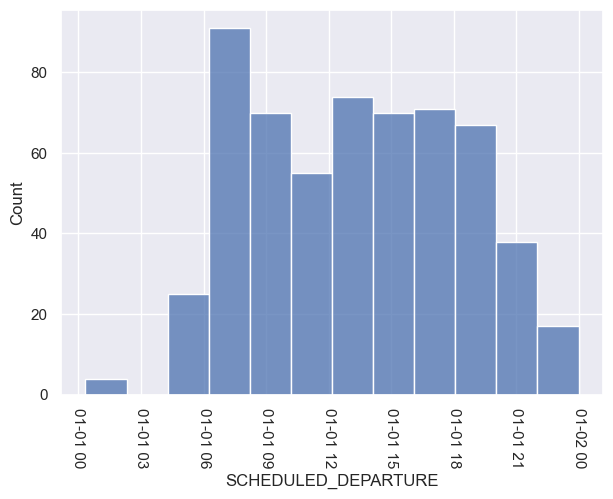

In [25]:
sns.set_theme(rc={'figure.figsize':(7,5)})

#fig, axs = plt.subplots(ncols = 4, nrows = 8)
#fig.tight_layout(pad = 2.0)

a = sns.histplot(data = flights_sample, x=flights_sample["SCHEDULED_DEPARTURE"], label = flights_sample.columns[9]) #ax = axs[0,0]

a.tick_params(axis='x', labelrotation=-90)

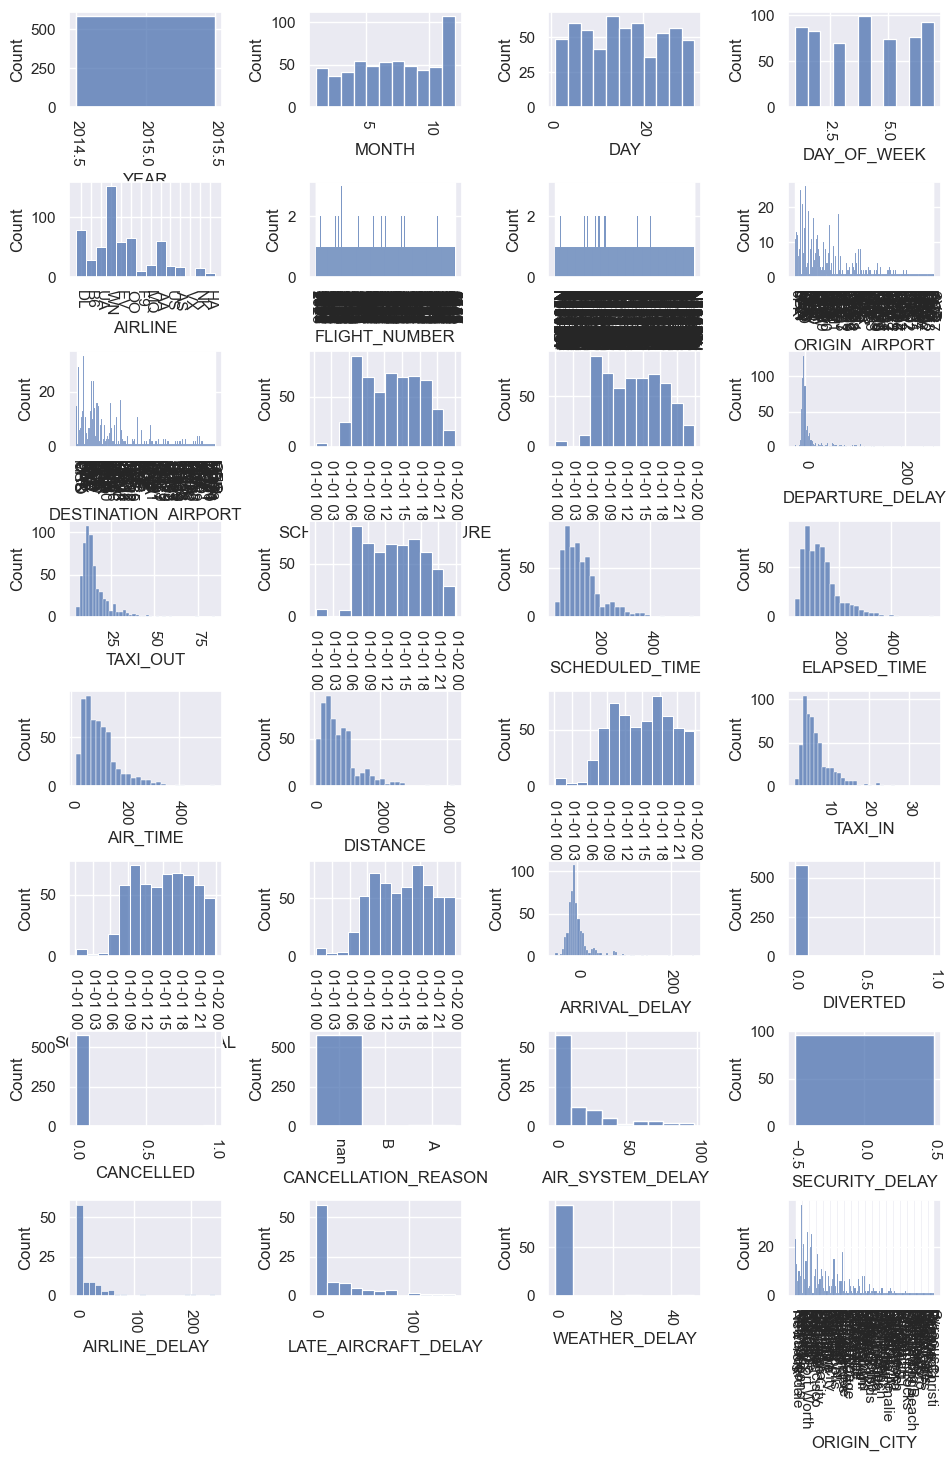

In [26]:
#set figure size
sns.set_theme(rc={'figure.figsize':(10,14)})
#create 32 subplots to fit all the columns
fig, axs = plt.subplots(ncols = 4, nrows = 8)
#tighten the layout, improve visibility
fig.tight_layout(pad = 2.5)
#save all the column names
column_names = flights_sample.columns
#set a count to iterate over all the columns
count = 0 
for row in range(8): 
    for column in range(4):
        #plot each of the columns on its own graph
        a = sns.histplot(data = flights_sample, x=flights_sample[column_names[count]], 
                     ax = axs[row,column], label = column_names[count])
        #rotate the x-tick labels, improve visibility
        a.tick_params(axis='x', labelrotation=-90)
        count += 1

Which /airline/ should you fly on to avoid significant /delays/?

<i>Possible data types: numeric, boolean, <b>datetime</b>, object, categorical, string</i>

**Process: Board/Depart > Taxi out > Wheels off > Fly/Air > Wheels on > Taxi In > Arrive/Deboard**

<b>31 Columns in the dataframe:</b> 
1. <b>Year:</b> (datetime) 1 year
2. <b>Month:</b> (Datetime) 12 months; Possible increase in number of flights due to holidays (winter, spring break)
3. <b>Day:</b> (Datetime) 31 days; Not a constant number of flights per day, why? 
4. <b>Day of the week:</b> (float) 1-7: Sun - Sat; Possible increase in number of flights on Thursday (weekend trips)
5. <b>Airline:</b> (object) 14 acronyms/airlines;  Some airlines more popular than others: 1) Southwest, 2) American/Delta, 3) EV
6. <b>Flight number:</b> (object) 6952 1- to 4-digit number; seems mostly constant
7. <b>Tail number:</b> (object) 4897 unique ID numbers; seems mostly constant
8. <b>Origin airport:</b> (object) 930 3-letter IATA airport code; definitely a trend of some airports more popular than others
9. <b>Destination airport:</b> (o) 930 3-letter IATA airport code; definitely a trend of some airports more popular than others
10. <b>Scheduled departure:</b> (datetime) time point; definitely a decrease over the course of the day
11. <b>Departure time:</b> (datetime) time point; a similar trend to scheduled department, i.e. decrease 
12. <b>Departure delay:</b> (float) time duration, in minutes; a decreasing trend (i.e. most popular to have a short delay)
13. <b>Taxi out:</b>  (float) time duration, in minutes; normal histogram with a skew-right, peak around 15 min (i.e. normally short unless possible traffic delays)
14. <b>Wheels off:</b> (datetime) time point; similar trend to scheduled/departure  
15. <b>Scheduled time:</b> (float) time duration, in minutes; somewhat normal histogram with a skew-right (exp. since mostly short flights)
16. <b>Elapsed time:</b> (float) time duration, in minutes; mostly match scheduled time
17. <b>Air time:</b> (float) time duration, in minutes; mostly match scheduled time
18. <b>Distance:</b> (float) distance, assumed miles; mostly match scheduled time since longer flights ~ more time
19. <b>Wheels on:</b> (datetime) time point; mostly constant, slight skew-left
20. <b>Taxi in:</b> (float) time duration, in minutes; similar to taxi in
21. <b>Scheduled arrival:</b> (datetime) time point; mostly match shape of wheels on 
22. <b>Arrival time:</b> (Datetime) time point; mostly match shape of wheels on **Definition: Delay = schedule - time**
23. <b>Arrival delay:</b> (Float) time duration, in minutes; normal distribution, peak around 0 **Definition = Take off or land delay: Match or not?**
24. <b>Diverted:</b> binary for either no: 0 or yes: 1; float (best for ML model)
25. <b>Cancelled:</b> binary for either no: 0 or yes: 1; float (best for ML model)
26. <b>Cancelation reason:</b> reason for cancellation, 4 categories: A: airline, B: weather, C: air system, D: security (object)
27. <b>Air system delay:</b> "C" time duration, in minutes? (float)
28. <b>Security delay:</b> "D" time duration, in minutes? (float)
29. <b>Airline delay:</b> "A" time duration, in minutes? (float)
30. <b>Late aircraft delay:</b> Other reason? time duration, in minutes? (float)
31. <b>Weather delay:</b>  "B" time duration, in minutes? (float)

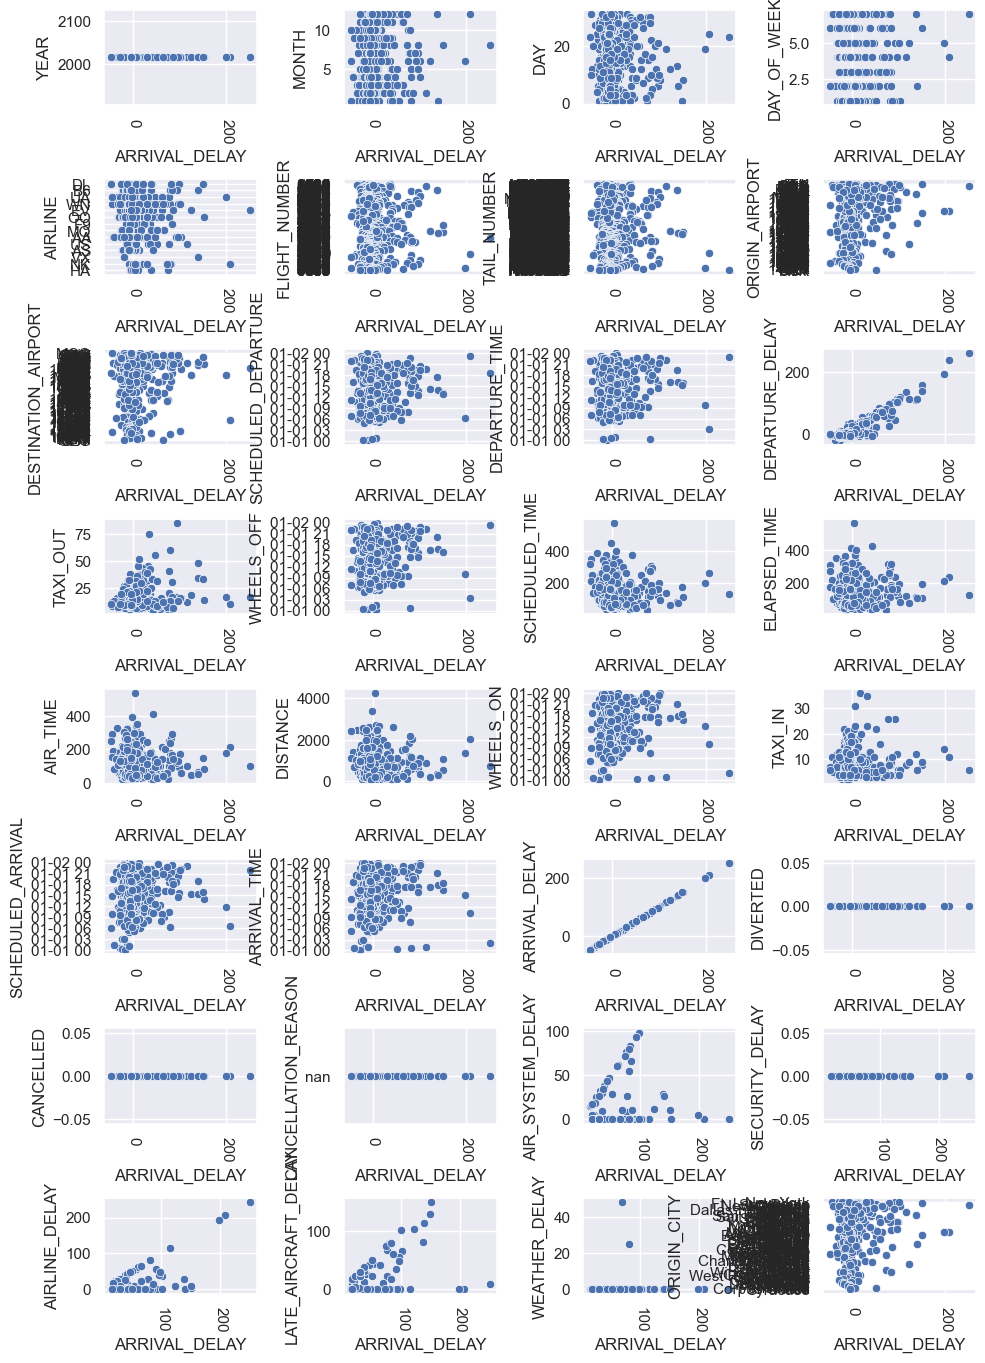

In [28]:
#set figure size
sns.set_theme(rc={'figure.figsize':(10,14)})
#create 32 subplots to fit all the columns
fig, axs = plt.subplots(ncols = 4, nrows = 8)
#tighten the layout, improve visibility
fig.tight_layout(pad = 2.5)
#save all the column names
column_names = flights_sample.columns
#set a count to iterate over all the columns
count = 0 
for row in range(8): 
    for column in range(4):
        #plot each of the columns on its own graph
        a = sns.scatterplot(data = flights_sample, x="ARRIVAL_DELAY", 
                     ax = axs[row,column], y = column_names[count])
        #rotate the x-tick labels, improve visibility
        a.tick_params(axis='x', labelrotation=-90)
        count += 1

#plt.savefig("my_plot.jpg",dpi=300)

<Axes: xlabel='MONTH', ylabel='Count'>

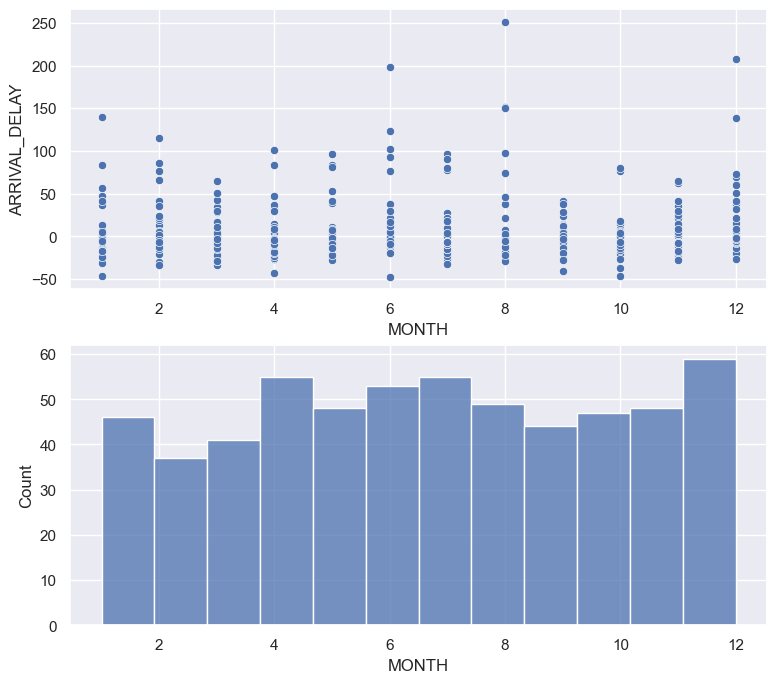

In [29]:
#could delays be triggered by seasons? 

#set figure size
sns.set_theme(rc={'figure.figsize':(9,8)})
#create 2 figures on 1 plot
fig, axs = plt.subplots(ncols = 1, nrows = 2)
#plot scatterplot
#sns.scatterplot(data = flights_sample, x= "MONTH", y = "ARRIVAL_DELAY", ax = axs[0])
sns.scatterplot(data = flights_sample, x= "MONTH", y = "ARRIVAL_DELAY", ax = axs[0])

#plot histogram to see if any trends due to pure counts
sns.histplot(data = flights_sample, x = "MONTH", bins = 12, ax = axs[1])

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
#import missingno as msno #what
import os
#import wget
import openpyxl
import math

In [31]:
#Create dataframe of number of flights per state (From sample)
flights_frequency = pd.DataFrame(flights_sample.ORIGIN_STATE.value_counts())

#Create dataframe of number of delays per state (From sample)
delay_frequency = pd.DataFrame(flights_sample.loc[flights_sample["ARRIVAL_DELAY"]>0, "ORIGIN_STATE"].value_counts())

##Create dataframe of average delay by city (From sample)
delay_average = pd.crosstab(index=flights_sample["ORIGIN_CITY"], columns=flights_sample["CANCELLATION_REASON"], values=flights_sample["ARRIVAL_DELAY"], aggfunc="mean")
#delay_average
delay_average = delay_average.sort_values(by="nan", ascending=False)
delay_average.head(10)

CANCELLATION_REASON,nan
ORIGIN_CITY,
Lafayette,123.0
Windsor Locks,83.0
Lihue,74.0
Midland,72.0
Waco,51.0
Moline,48.5
Myrtle Beach,47.5
Baltimore,28.7
Kahului,26.0


In [32]:
#Could delays be triggered by certain states? Climate? More populous regions? 

##set figure size
sns.set_theme(rc={'figure.figsize':(9,8)})
##create 2 figures on 1 plot
#fig, axs = plt.subplots(ncols = 1, nrows = 2)
##Create a histogram of states number of flights
    ##of course they're bigger in states with more population or international airports --> normalize
#a = sns.histplot(data = flights_sample, x = "ORIGIN_STATE", bins = 50) #, ax = axs[0]
#a.tick_params(axis='x', labelrotation=-90)
##Create u.s. map plot
gdf = gpd.read_file('./data/cb_2018_us_state_500k.shp') #read the gpd file
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [33]:
gdf_origin = gdf.merge(flights_frequency,left_on='STUSPS',right_on='ORIGIN_STATE') #merge both files
gdf_origin.head()

gdf_delay = gdf.merge(delay_frequency,left_on='STUSPS',right_on='ORIGIN_STATE') #merge both files
gdf_delay.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,count
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",3
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",5
2,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2...",5
3,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",2
4,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",1


In [34]:
#pip install geodatasets

In [35]:
import geodatasets
import geopandas as gpd

states = gpd.read_file('./data/cb_2018_us_state_500k.shp')
print(states.shape)
states.head(len(states))

(56, 10)


C:\Users\Alissa\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [36]:
states_filtered = states.copy()
states_filtered = states_filtered.loc[states_filtered['NAME']!= 'American Samoa' ]
states_filtered = states_filtered.loc[states_filtered['NAME']!= 'Commonwealth of the Northern Mariana Islands']
states_filtered = states_filtered.loc[states_filtered['NAME']!= 'United States Virgin Islands' ]
states_filtered = states_filtered.loc[states_filtered['NAME']!= 'Puerto Rico' ]
states_filtered = states_filtered.loc[states_filtered['NAME']!= 'Guam' ]
#states_filtered = states_filtered.loc[states_filtered['NAME']!= 'Hawaii' ] #its close to mainland
states_filtered = states_filtered.loc[states_filtered['NAME']!= 'Alaska' ] #I'll fix Alaska later XD


print(states_filtered.shape)
states_filtered.head(len(states_filtered))

(50, 10)


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


<Axes: >

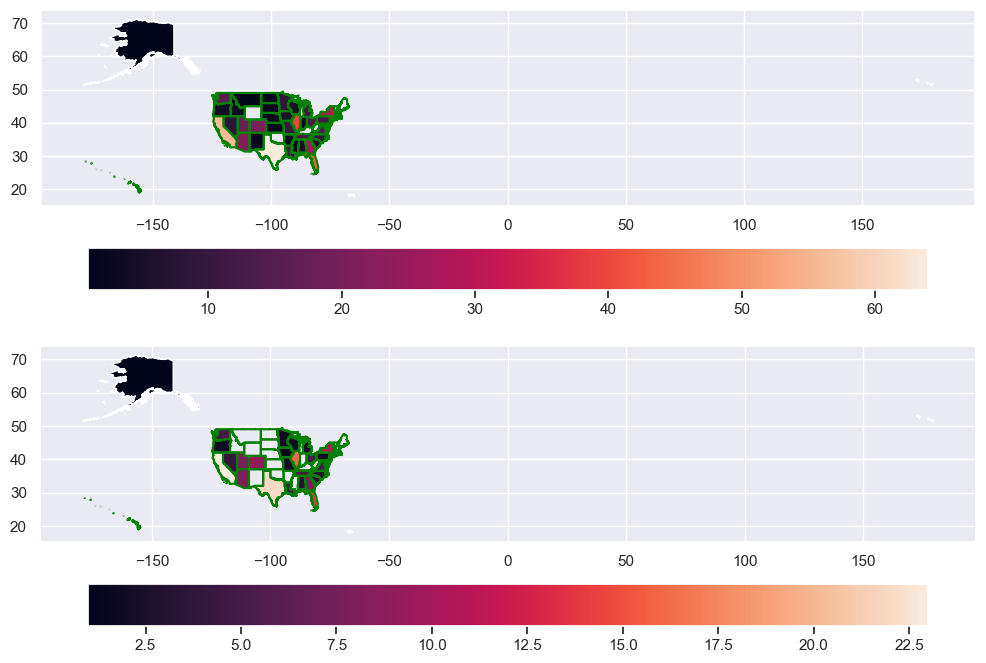

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
states_filtered.boundary.plot(color="green",ax=ax[0]) #set boundary lines
states_filtered.boundary.plot(color="green",ax=ax[1]) #set boundary lines
#create heatmap based on number of origin_flights per state
gdf_origin.plot(column = 'count',legend = True,legend_kwds={"orientation":"horizontal"},ax=ax[0]) 
#create heatmap based on number of delays per state
gdf_delay.plot(column = 'count',legend = True,legend_kwds={"orientation":"horizontal"},ax=ax[1]) 

C:\Users\Alissa\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(185.85330052685387, 0.5, 'Latitude')

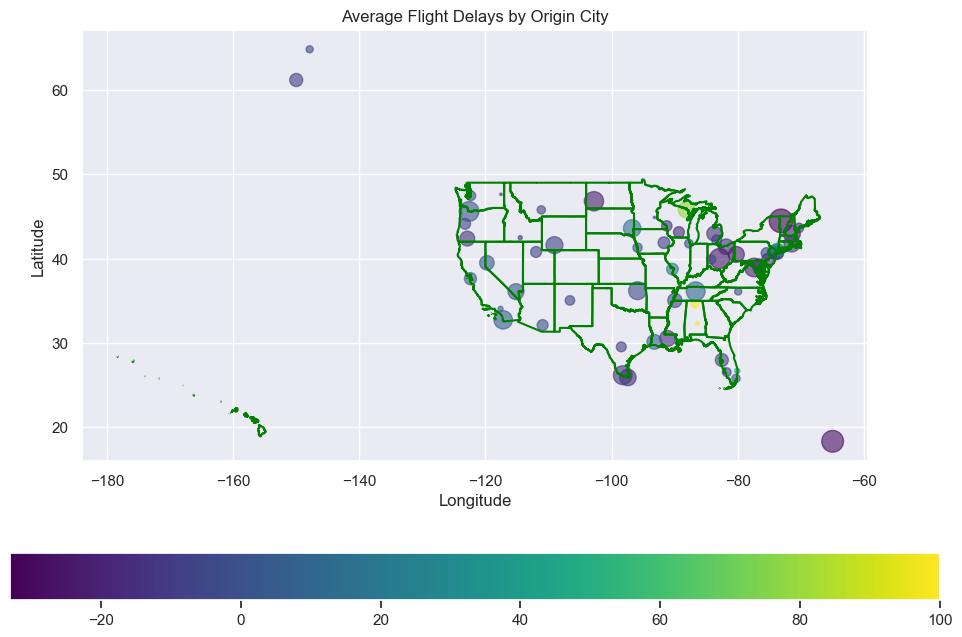

In [38]:
#re-merge with the latitude and longitude
locations_merged = pd.merge(flights, airports[["IATA_CODE","CITY","STATE", "LATITUDE", "LONGITUDE"]], 
                            how = "left", left_on = "ORIGIN_AIRPORT", right_on = "IATA_CODE")
locations_merged = locations_merged.rename(columns = {"CITY":"ORIGIN_CITY","STATE":"ORIGIN_STATE"})
locations_merged = locations_merged.drop("IATA_CODE", axis = 1)

#resample this data set
flights_location_sample = locations_merged.sample(frac = .0001)

##import shape file
##gdf_city = gpd.read_file('./data/cb_2018_us_state_500k.shp') #read the gpd file

#Calculate average delay vy city
average_delay = flights_location_sample.groupby(['ORIGIN_CITY', 'ORIGIN_STATE', 'LATITUDE', 'LONGITUDE'])['ARRIVAL_DELAY'].mean().reset_index()

#Create point geometries directly from latitude and longitude
import geopandas
from shapely.geometry import Point
#A geometry type that represents a single coordinate
    #zip() aggregates elements from multiple iterables (like lists, tuples, or strings) into an iterator
geometry = [Point(xy) for xy in zip(average_delay['LONGITUDE'], average_delay['LATITUDE'])]
# Create a GeoDataFrame
    #A GeoDataFrame object is a pandas.DataFrame that has one or more columns containing geometry
        #geometry = Value to use as the active geometry column
        #crs = Coordinate Reference System of the geometry objects
gdf_average_delay = geopandas.GeoDataFrame(average_delay, geometry=geometry, crs="EPSG:4326")

##merge both files
##gdf_average_delay = gdf_city.merge(average_delay,left_on='STUSPS',right_on='ORIGIN_STATE') 

#set base map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
states_filtered.boundary.plot(color="green",ax=ax) #set boundary lines

# Normalize the average delay for circle size and color intensity
norm_delay_size = gdf_average_delay['ARRIVAL_DELAY'] - gdf_average_delay['ARRIVAL_DELAY'] / gdf_average_delay['ARRIVAL_DELAY'].std() * 1000
norm_delay_color = gdf_average_delay['ARRIVAL_DELAY'] - gdf_average_delay['ARRIVAL_DELAY'] / gdf_average_delay['ARRIVAL_DELAY'].std()

# Plot the cities with size and color representing average delay
gdf_average_delay.plot(column = 'ARRIVAL_DELAY',
                       legend = True,
                       legend_kwds={"orientation":"horizontal"},
                       marker='o',
                       markersize = norm_delay_size,
                       cmap = 'viridis',
                       vmax = 100,
                       alpha = 0.6,
                       ax=ax) 

# Set plot title and labels
ax.set_title('Average Flight Delays by Origin City')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


In [39]:
average_delay.head()

,ORIGIN_CITY,ORIGIN_STATE,LATITUDE,LONGITUDE,ARRIVAL_DELAY
0,Aguadilla,PR,18.49486,-67.12944,863.000000
1,Albuquerque,NM,35.04022,-106.60919,-5.333333
2,Allentown,PA,40.65236,-75.44040,-7.000000
3,Anchorage,AK,61.17432,-149.99619,-10.000000
4,Arlington,VA,38.85208,-77.03772,9.363636


# 4th Goal: Pre-Processing

In [41]:
#Cancellations--- 4 categories: A: airline, B: weather, C: air system, D: security, "E: late aircraft"
#does it print a cancellation reason?
#print(flights_delayed["CANCELLATION_REASON"].value_counts()) #answer: No

#filter for only delayed flights
flights_delayed = flights_sample.loc[flights_sample["ARRIVAL_DELAY"] > 0,:]
#print(flights_delayed.head())

#Use the max delay to label the cancellation reason
flights_delayed["CANCELLATION_REASON"] = flights_delayed[["AIR_SYSTEM_DELAY",
                                                          "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY",
                                                          "WEATHER_DELAY"]].idxmax(axis = 1)
#print(flights_delayed.head())

flights_delayed = flights_delayed.replace({"AIR_SYSTEM_DELAY":"C",
                                          "SECURITY_DELAY":"D","AIRLINE_DELAY":"A","LATE_AIRCRAFT_DELAY":"E",
                                          "WEATHER_DELAY":"B"})
print(flights_delayed.head())


         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE FLIGHT_NUMBER TAIL_NUMBER  \
5594279  2015     12   17            4      B6          1130      N190JB   
5110418  2015     11   16            1      F9          1490      N924FR   
1557664  2015      4   10            5      WN           702      N779SW   
2749282  2015      6   22            1      AA           190      N547AA   
758677   2015      2   19            4      US           545      N587UW   

        ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ...  \
5594279            FLL                 CHS 1900-01-01 13:00:00  ...   
5110418            AUS                 ATL 1900-01-01 07:00:00  ...   
1557664            DEN                 OKC 1900-01-01 12:35:00  ...   
2749282            DFW                 SAT 1900-01-01 16:25:00  ...   
758677             PHX                 DFW 1900-01-01 19:50:00  ...   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY LATE_AIRCRAFT_DELAY  \
5594279              0.0             

C:\Users\Alissa\AppData\Local\Temp\ipykernel_24556\866835614.py:12: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  "WEATHER_DELAY"]].idxmax(axis = 1)
C:\Users\Alissa\AppData\Local\Temp\ipykernel_24556\866835614.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_delayed["CANCELLATION_REASON"] = flights_delayed[["AIR_SYSTEM_DELAY",


{'AIRLINE_DELAY': 'A', 'WEATHER_DELAY': 'B', 'AIR_SYSTEM_DELAY': 'C', 'SECURITY_DELAY': 'D', 'LATE_AIRCRAFT_DELAY': 'E'}


<Axes: xlabel='MONTH'>

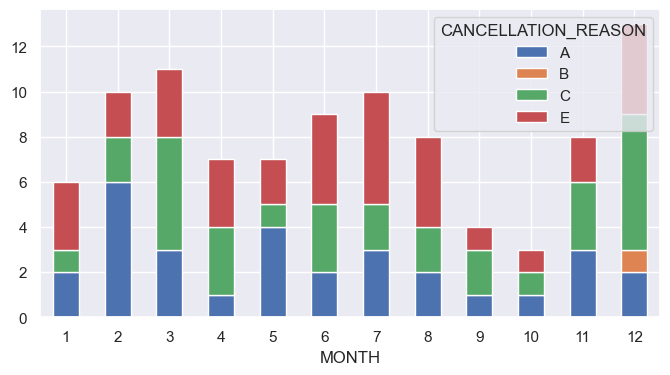

In [42]:
#set figure size
sns.set_theme(rc={'figure.figsize':(8,4)})
#plot data by scatterplot
#sns.scatterplot(data = flights_delayed, x= "MONTH", y = "ARRIVAL_DELAY", hue = "CANCELLATION_REASON") #hard to read
#visualize data with table
#flights_delayed.groupby(by = ["MONTH"], dropna = False).sum() #can't group by datetime data type
print({"AIRLINE_DELAY":"A", "WEATHER_DELAY":"B","AIR_SYSTEM_DELAY":"C","SECURITY_DELAY":"D","LATE_AIRCRAFT_DELAY":"E"})
#visualize data with table
summary_cancellation = pd.crosstab(flights_delayed["MONTH"], flights_delayed["CANCELLATION_REASON"]) #may include: dropna = False
#create stacked bar chart
summary_cancellation.plot(kind = "bar", stacked = True, rot = 0)

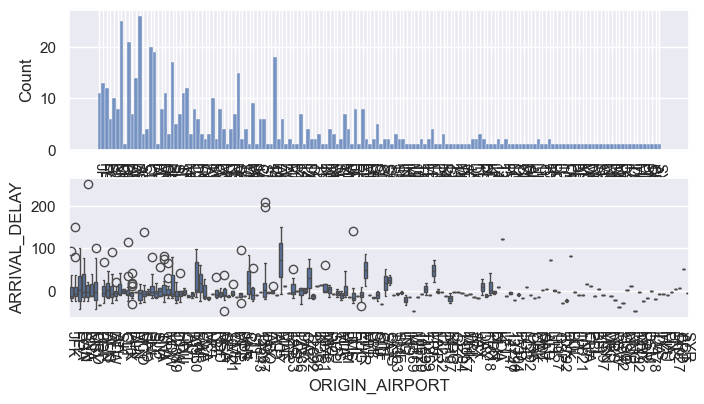

In [43]:
fig, axs = plt.subplots(ncols = 1, nrows = 2)

sns.set_theme(rc={'figure.figsize':(24,8)})
a = sns.histplot(data = flights_sample, x = "ORIGIN_AIRPORT", ax = axs[0])
a.tick_params(axis='x', labelrotation=-90)

b = sns.boxplot(data = flights_sample, x = "ORIGIN_AIRPORT", y = "ARRIVAL_DELAY", ax = axs[1])
b.tick_params(axis='x', labelrotation=-90)


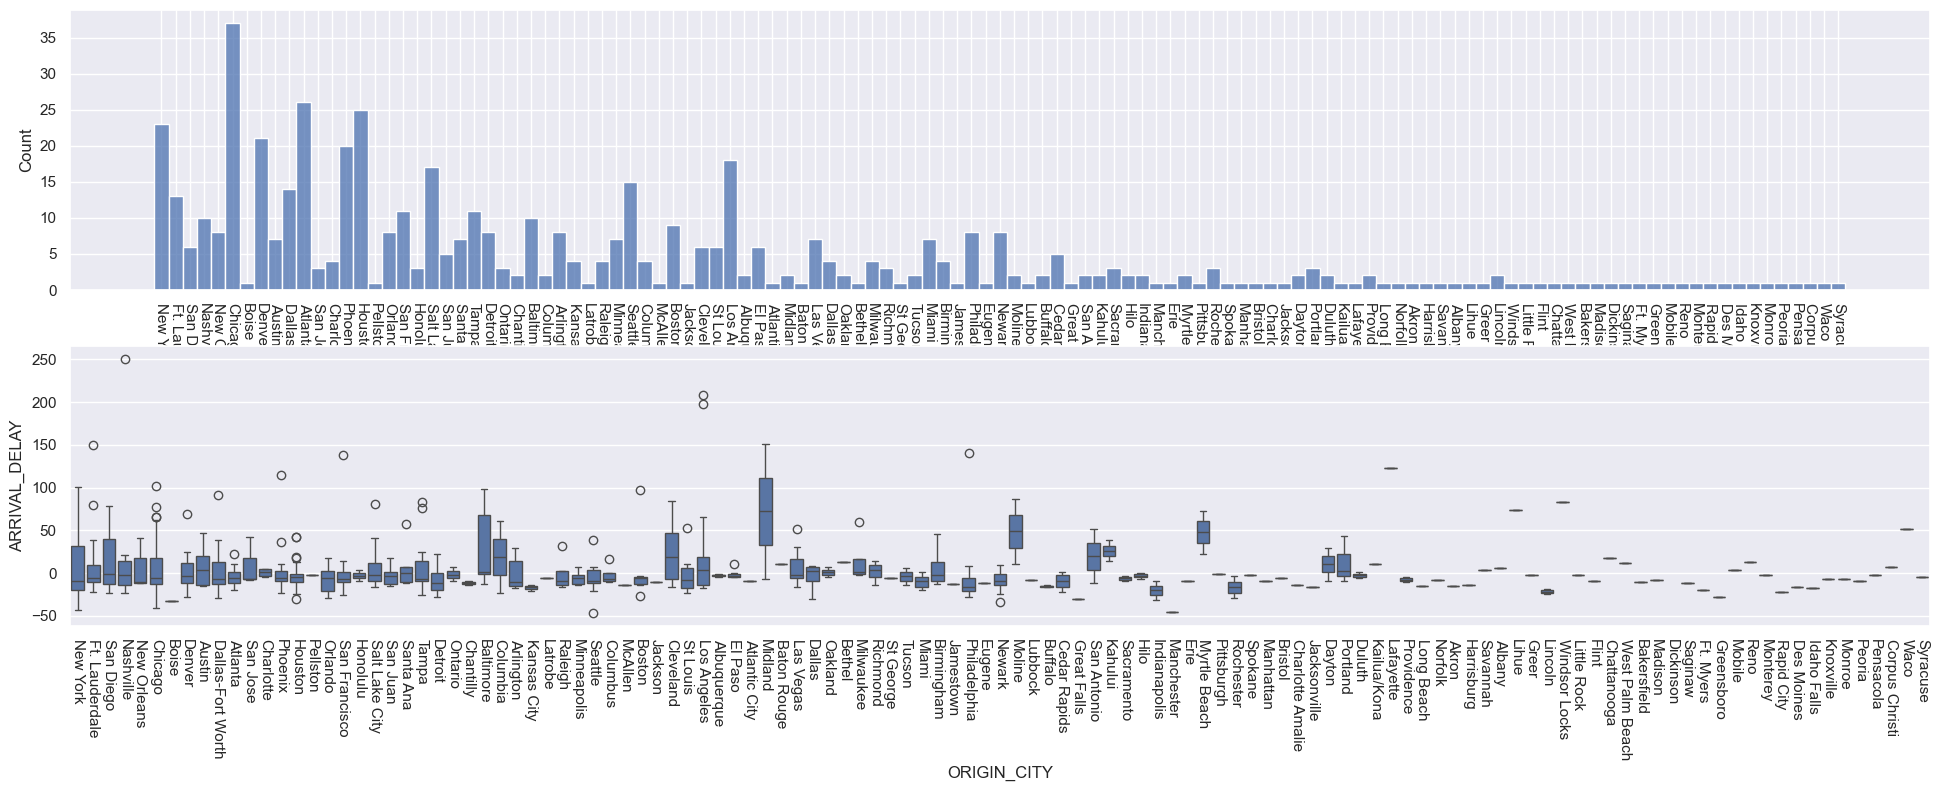

In [44]:
fig, axs = plt.subplots(ncols = 1, nrows = 2)

sns.set_theme(rc={'figure.figsize':(24,8)})
a = sns.histplot(data = flights_sample, x = "ORIGIN_CITY", ax = axs[0])
a.tick_params(axis='x', labelrotation=-90)

b = sns.boxplot(data = flights_sample, x = "ORIGIN_CITY", y = "ARRIVAL_DELAY", ax = axs[1])
b.tick_params(axis='x', labelrotation=-90)


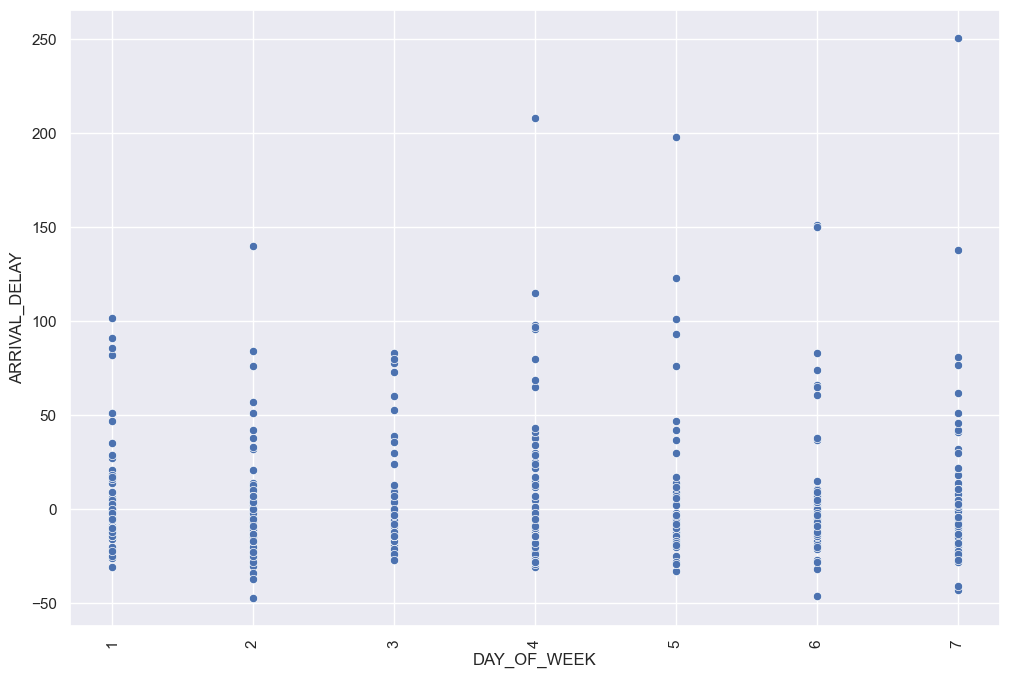

In [45]:
sns.set_theme(rc={'figure.figsize':(12,8)})
#Time of the day
#a = sns.scatterplot(data = flights_sample, x = "SCHEDULED_DEPARTURE", y = "ARRIVAL_DELAY")

#DAY_OF_WEEK
a = sns.scatterplot(data = flights_sample, x = "DAY_OF_WEEK", y = "ARRIVAL_DELAY")

a.tick_params(axis='x', labelrotation=+90)


In [46]:
flights_time = flights_sample.SCHEDULED_DEPARTURE.dt.time

# 5th Goal: Diagnose

In [48]:
#create an array of all the airline names
airlines = flights_sample["AIRLINE"].unique()
print(airlines)
airlines_names = ["American Airlines","JetBlue", "Envoy Air", "Delta Air", "Southwest", "US Airways", "EV", "OO", "Hawaiian", 
                  "Alaska", "United", "Spirit","VX", "Frontier"]

['DL' 'B6' 'UA' 'WN' 'EV' 'OO' 'F9' 'MQ' 'AA' 'US' 'AS' 'VX' 'NK' 'HA']


IndexError: index 14 is out of bounds for axis 0 with size 14

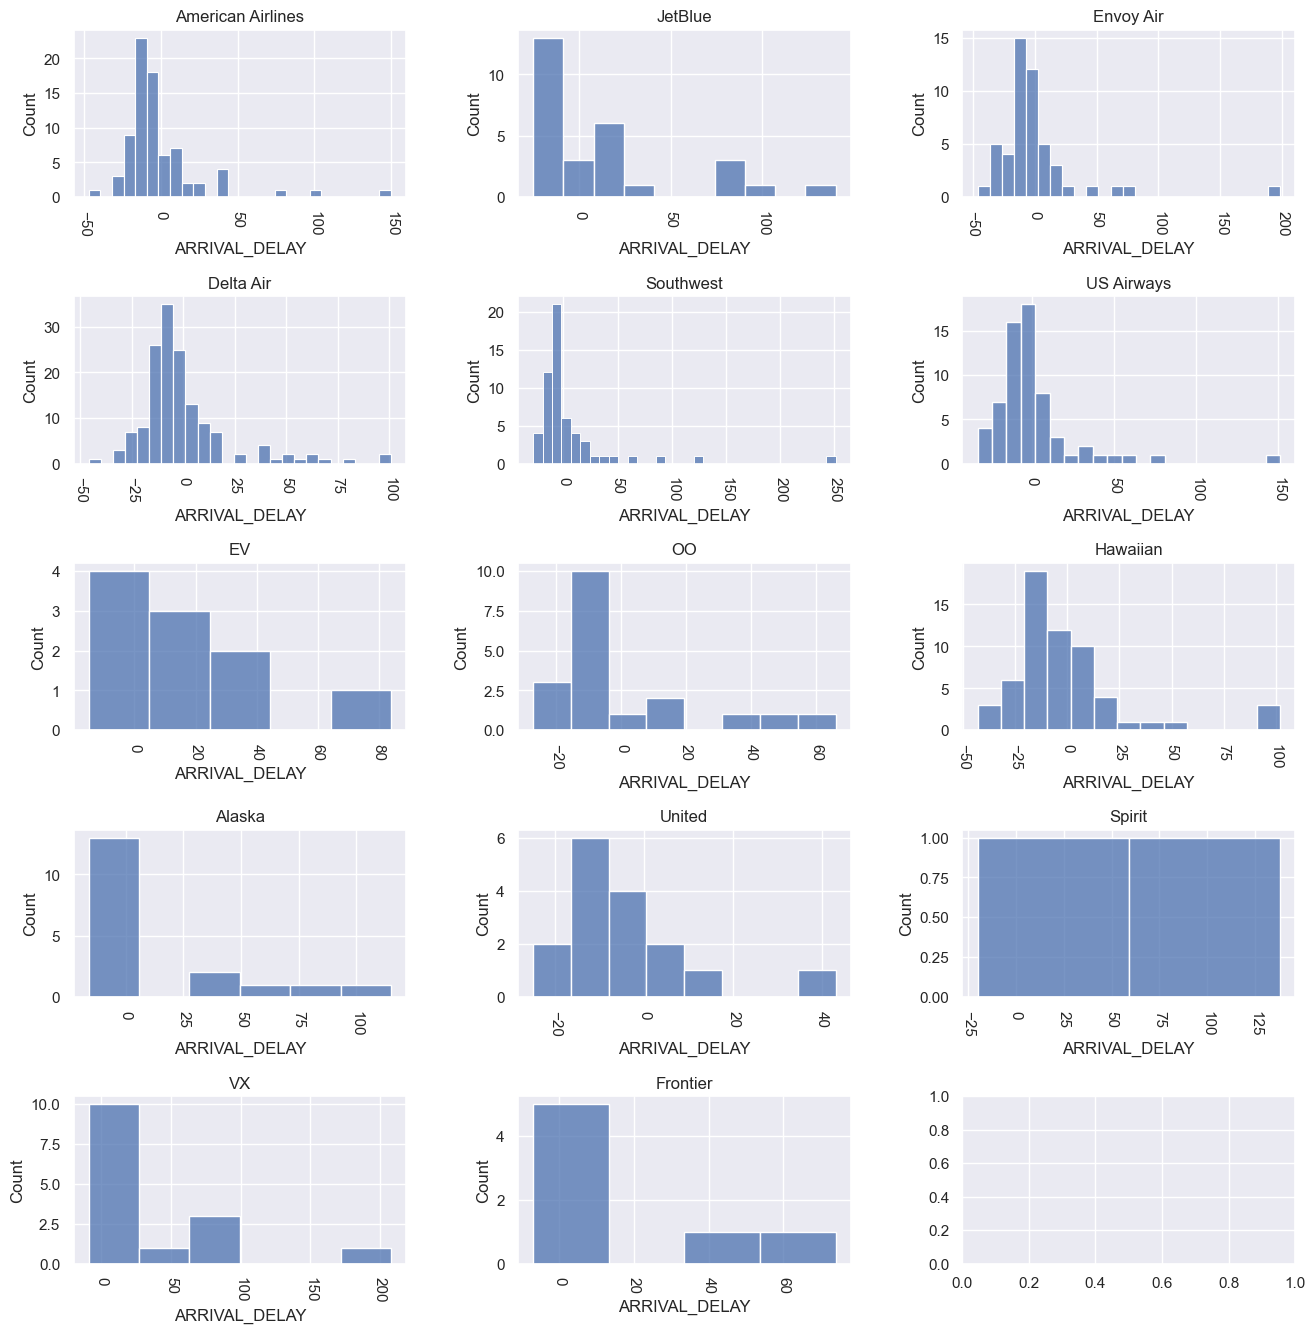

In [49]:
#set figure size
sns.set_theme(rc={'figure.figsize':(14,14)})
#create 32 subplots to fit all the columns
fig, axs = plt.subplots(ncols = 3, nrows = 5)
#tighten the layout, improve visibility
fig.tight_layout(pad = 4)
#set a count to iterate over all the columns
count = 0 
for row in range(5): 
    for column in range(3):
        #plot each of the columns on its own graph
        a = sns.histplot(data = flights_sample.loc[flights_sample["AIRLINE"]==airlines[count]], x="ARRIVAL_DELAY", 
                      ax = axs[row,column], label = airlines[count])
        #rotate the x-tick labels, improve visibility
        a.set_title(airlines_names[count])
        a.tick_params(axis='x', labelrotation=-90)
        count += 1

In [50]:
#find mean to display average arrival delay
flights_sample.loc[flights_sample["AIRLINE"]=="OO", "ARRIVAL_DELAY"].mean()

1.171875

# 6th Goal: Predict

In [52]:
print(flights_sample.shape)
flights_sample.head()


(582, 36)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE,date
2538905,2015,6,10,3,DL,2828,N707TW,JFK,MCO,1900-01-01 08:00:00,...,NaN,NaN,NaN,NaN,NaN,New York,NY,Orlando,FL,2015-06-10
5594279,2015,12,17,4,B6,1130,N190JB,FLL,CHS,1900-01-01 13:00:00,...,0.0,0.0,13.0,25.0,0.0,Ft. Lauderdale,FL,Charleston,SC,2015-12-17
2977359,2015,7,6,1,UA,1981,N27724,LGA,ORD,1900-01-01 14:09:00,...,NaN,NaN,NaN,NaN,NaN,New York,NY,Chicago,IL,2015-07-06
3923450,2015,9,1,2,WN,299,N614SW,SAN,OAK,1900-01-01 07:55:00,...,NaN,NaN,NaN,NaN,NaN,San Diego,CA,Oakland,CA,2015-09-01
5587440,2015,12,17,4,EV,6022,N14977,BNA,ORD,1900-01-01 06:10:00,...,NaN,NaN,NaN,NaN,NaN,Nashville,TN,Chicago,IL,2015-12-17


In [53]:
for each in flights_sample.columns: 
    print(each, flights_sample[each].dtype)
    print(flights_sample[each].isna().sum())

YEAR int64
0
MONTH int64
0
DAY int64
0
DAY_OF_WEEK int64
0
AIRLINE object
0
FLIGHT_NUMBER object
0
TAIL_NUMBER object
0
ORIGIN_AIRPORT object
0
DESTINATION_AIRPORT object
0
SCHEDULED_DEPARTURE datetime64[ns]
0
DEPARTURE_TIME datetime64[ns]
6
DEPARTURE_DELAY float64
6
TAXI_OUT float64
6
WHEELS_OFF datetime64[ns]
6
SCHEDULED_TIME float64
0
ELAPSED_TIME float64
8
AIR_TIME float64
8
DISTANCE int64
0
WHEELS_ON datetime64[ns]
6
TAXI_IN float64
6
SCHEDULED_ARRIVAL datetime64[ns]
0
ARRIVAL_TIME datetime64[ns]
7
ARRIVAL_DELAY float64
8
DIVERTED int64
0
CANCELLED int64
0
CANCELLATION_REASON object
0
AIR_SYSTEM_DELAY float64
486
SECURITY_DELAY float64
486
AIRLINE_DELAY float64
486
LATE_AIRCRAFT_DELAY float64
486
WEATHER_DELAY float64
486
ORIGIN_CITY object
47
ORIGIN_STATE object
47
DESTINATION_CITY object
47
DESTINATION_STATE object
47
date datetime64[ns]
0


In [54]:
#drop the delay columns 
flights_sample = flights_sample.drop(columns = ["AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"])

In [55]:
#drop rows with more than one NAN
missing_rows = flights_sample.loc[flights_sample.isna().sum(axis = 1)>1,:]
flights_sample = flights_sample.drop(missing_rows.index)
#flights_sample.head(5)
print(flights_sample[flights_sample.isna().any(axis=1)].head(10))


         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE FLIGHT_NUMBER TAIL_NUMBER  \
5370810  2015     12    2            3      NK           350      N530NK   

        ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ...  \
5370810            MYR                 ACY 1900-01-01 21:30:00  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED CANCELLED  CANCELLATION_REASON  \
5370810          NaT           73.0         0         0                  nan   

          ORIGIN_CITY  ORIGIN_STATE  DESTINATION_CITY DESTINATION_STATE  \
5370810  Myrtle Beach            SC     Atlantic City                NJ   

              date  
5370810 2015-12-02  

[1 rows x 31 columns]


In [56]:
#identify types of columns
columns_target = flights_sample["ARRIVAL_DELAY"]
columns_features = flights_sample.drop(columns = "ARRIVAL_DELAY")
num_cols = flights_sample.select_dtypes(['integer', 'float']).drop(columns = "ARRIVAL_DELAY").columns
cat_cols = flights_sample.select_dtypes(['object']).columns
date_cols = flights_sample.select_dtypes(['datetime64']).columns

In [64]:
#one-hot-encoding our categorical features
flights_sample_ohe = pd.get_dummies(flights_sample, columns = cat_cols)

flights_sample_ohe.head()

KeyError: "None of [Index(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',\n       'DESTINATION_AIRPORT', 'CANCELLATION_REASON', 'ORIGIN_CITY',\n       'ORIGIN_STATE', 'DESTINATION_CITY', 'DESTINATION_STATE'],\n      dtype='object')] are in the [columns]"

In [58]:
from sklearn.model_selection import train_test_split

#train/test split of rows
X_train, X_test, y_train, y_test = train_test_split(flights_sample.drop(columns=["ARRIVAL_DELAY"]), 
                                                    flights_sample["ARRIVAL_DELAY"], 
                                                    test_size = 0.10, 
                                                    random_state = 42)

**Are ML models okay with date time features?**

*The most common and often effective strategy is to break down the datetime feature into its constituent numerical parts. This allows the model to capture different aspects of time.* 

Examples include:  

- Year: The year as an integer.
- Month: The month as an integer (1-12). 
- Day: The day of the month as an integer (1-31).  
- Day of the Week: The day of the week as an integer (0-6, Monday-Sunday, or similar). 
- Hour: The hour of the day as an integer (0-23). 
- Minute: The minute of the hour (0-59).  
- Second: The second of the minute (0-59).
- Day of the Year: The day number within the year (1-365/366). This can capture annual trends.  
- Quarter: The quarter of the year (1-4).

*Consider: Cyclical Encoding*

In [68]:
#normalize our numeric features

for each in num_cols:
    X_train[each] = (X_train[each] - X_train[each].mean()) / X_train[each].std()
    X_test[each] = (X_test[each] - X_test[each].mean()) / X_test[each].std()

X_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,DESTINATION_STATE_PR,DESTINATION_STATE_SC,DESTINATION_STATE_SD,DESTINATION_STATE_TN,DESTINATION_STATE_TX,DESTINATION_STATE_UT,DESTINATION_STATE_VA,DESTINATION_STATE_WA,DESTINATION_STATE_WI,DESTINATION_STATE_WY
5627031,NaN,1.608813,0.396415,0.922655,1900-01-01 13:06:00,1900-01-01 13:20:00,0.192697,-0.058508,1900-01-01 13:35:00,-0.985475,...,False,False,False,False,False,False,False,False,False,False
16474,NaN,-1.597743,-1.558487,0.436723,1900-01-01 07:50:00,1900-01-01 07:49:00,-0.324312,4.544920,1900-01-01 08:45:00,0.266115,...,False,False,False,False,False,False,False,False,False,False
3214861,NaN,0.151287,0.511409,-1.507003,1900-01-01 14:40:00,1900-01-01 14:36:00,-0.427714,-0.844459,1900-01-01 14:44:00,-0.917454,...,False,False,False,False,True,False,False,False,False,False
5310399,NaN,1.317308,1.546357,1.408586,1900-01-01 10:05:00,1900-01-01 10:51:00,1.295649,2.074788,1900-01-01 11:25:00,0.864702,...,False,False,False,False,False,False,False,False,False,False
570891,NaN,-1.306238,-0.983516,0.922655,1900-01-01 16:05:00,1900-01-01 16:05:00,-0.289845,-0.507623,1900-01-01 16:16:00,0.619825,...,False,False,False,False,False,False,False,False,False,False


In [70]:
#remove date time for classifier functionality
X_train = X_train.drop(columns = date_cols)
X_test = X_test.drop(columns = date_cols)

In [76]:
#X_train.shape #(474, 1551)
X_test.shape #(53, 1551)

(53, 1551)

In [116]:
#random forest
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 500, 
                               min_samples_split = 15,
                               min_samples_leaf = 15,
                               random_state = 42, 
                               class_weight = "balanced").fit(X_train, y_train)
y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

In [118]:
#score the classifier
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Training {accuracy_train} versus Testing {accuracy_test}")

Training 0.12869198312236288 versus Testing 0.018867924528301886
